In [10]:
# import packages
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt # to plot inage, graph
import pickle

In [11]:
pickle_in = open("pickle/X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("pickle/y.pickle", "rb")
y = pickle.load(pickle_in)


In [12]:
print('# of Samples:', len(y))
print('# of IncorrectlyWornMask A Mask:', (y == 0).sum())
print('# of  With A Mask:', (y == 1).sum())
print('# of Without Mask:', (y == 2).sum())

# of Samples: 5995
# of IncorrectlyWornMask A Mask: 2103
# of  With A Mask: 1982
# of Without Mask: 1910


In [32]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Print the length and width of our testing data.
print('Length of our Training data: ', len(X_train), '\nLength of our Testing data: ', len(X_test))


Length of our Training data:  4796 
Length of our Testing data:  1199


In [33]:
# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=100, metric="euclidean" )

# Use training data to fit KNN model
knn.fit(X_train, y_train)
pickle.dump(knn,open("models/knn.pkl","wb"))

In [34]:
# make prediction on entire test data
predictions_set = knn.predict(X_test)
predictions_set

array([1, 2, 1, ..., 2, 0, 2])

In [35]:

print('KNN Accuracy: %.3f' % accuracy_score(y_test, predictions_set))

# #mô hình knn sử dụng thư viện sklearn
acc = accuracy_score(y_test, predictions_set)
precision = precision_score(y_test, predictions_set, average='macro')
recall = recall_score(y_test, predictions_set, average='macro')
f1 = f1_score(y_test, predictions_set, average='macro')
pickle.dump([acc,precision,recall,f1],open("models/knn_quality.pkl","wb"))


KNN Accuracy: 0.663


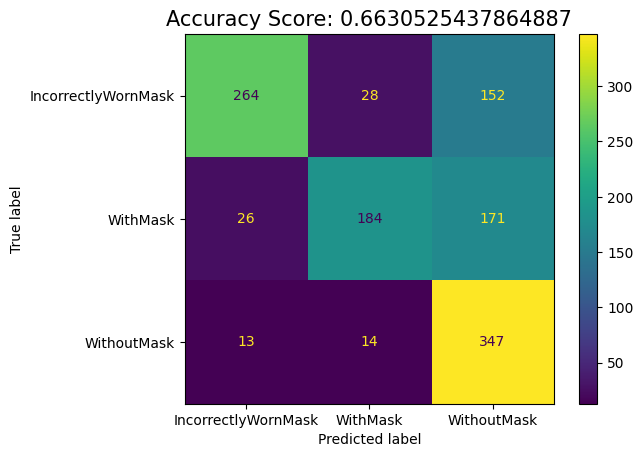

In [36]:
# Calculate Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay


# plot_confusion_matrix
class_names = ['IncorrectlyWornMask', 'WithMask','WithoutMask']

cnf_matrix = confusion_matrix(y_test, predictions_set)
disp = ConfusionMatrixDisplay(cnf_matrix,display_labels = class_names)
disp.plot()
plt.savefig("imagemodels/knn_confusion.png",dpi=120)
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, predictions_set))
plt.title(all_sample_title,size=15)
plt.show()

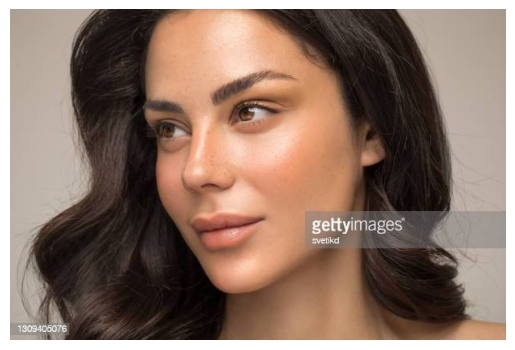

[2]
dự đoán: WithoutMask


In [37]:
# Test predict
from keras.preprocessing import image

imgshow = image.load_img("imgthucte/gettyimages-1309405076-612x612.jpeg")
plt.imshow(imgshow)
plt.axis('off')
plt.show()
imgpre = image.load_img("imgthucte/gettyimages-1309405076-612x612.jpeg", target_size=(32,32))
imgpre_array = image.img_to_array(imgpre)
imgpre_array = np.array(imgpre_array, dtype='float32')/255.0
imgpre_array = imgpre_array.reshape(-1,)
imgpre_array.shape
pre2 = knn.predict([imgpre_array])

switcher = { 0 : 'IncorrectlyWornMask',1 :'WithMask', 2 :'WithoutMask'}

print(pre2)
print("dự đoán:",switcher.get(pre2[0], "nothing"))